In [17]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# TREINAMENTO
Na pasta imagens nós temos duas outras pastas que são as classes a serem detectadas. Cada classe é um objeto, onde
vamos tentar diferenciar carros de objetos. É necessário no mínimo 2 classes, para distiguir duas coisas, podemos distinguir por exemplo
semáforos de outra coisa que não é semáforo, ou distinguir carros de bicicletas e de nenhum dos dois.

- Carregamento e Preparação dos Dados
- Construção do Modelo
- Compilação do Modelo
- Treinamento do Modelo (fit)

In [18]:
def createModel(data_dir, batch_size=32, epochs=10, sample=0.2):
    train_datagen = ImageDataGenerator(rescale=1./255, validation_split=sample)

    train_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=(200, 200),   # Redimensiona as imagens
        batch_size=batch_size,    # deve ser menor do que o numero de imagens
        class_mode='categorical', # Para classificação multiclasse
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=(200, 200),
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )

    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // validation_generator.batch_size,
        epochs=epochs
    )

    return model, history

def plotDataLoss(history):
    plt.figure(figsize=(12, 4))

    # Plot para a perda
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss - Treinamento')
    plt.plot(history.history['val_loss'], label='Loss - Validação')
    plt.title('Perda durante o Treinamento')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot para a acurácia
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Acurácia - Treinamento')
    plt.plot(history.history['val_accuracy'], label='Acurácia - Validação')
    plt.title('Acurácia durante o Treinamento')
    plt.xlabel('Epoch')
    plt.ylabel('Acuracy')
    plt.legend()

    plt.show()


Found 14 images belonging to 2 classes.
Found 2 images belonging to 2 classes.
Epoch 1/10
7/7 [==============================] - 5s 495ms/step - loss: 7.9865 - accuracy: 0.2857 - val_loss: 0.7257 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 3s 439ms/step - loss: 0.4163 - accuracy: 0.8571 - val_loss: 0.5429 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 3s 422ms/step - loss: 0.2030 - accuracy: 1.0000 - val_loss: 0.4715 - val_accuracy: 1.0000
Epoch 4/10
7/7 [==============================] - 3s 448ms/step - loss: 0.1092 - accuracy: 1.0000 - val_loss: 1.1590 - val_accuracy: 0.5000
Epoch 5/10
7/7 [==============================] - 3s 466ms/step - loss: 0.0234 - accuracy: 1.0000 - val_loss: 2.2586 - val_accuracy: 0.5000
Epoch 6/10
7/7 [==============================] - 3s 431ms/step - loss: 0.0485 - accuracy: 1.0000 - val_loss: 2.2064 - val_accuracy: 0.5000
Epoch 7/10
7/7 [==============================] - 3s 439ms/step - loss: 0.0095 - 

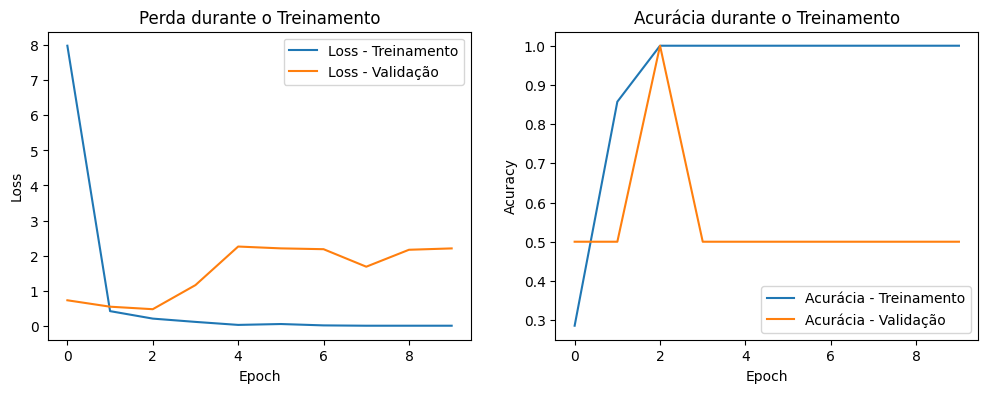

In [19]:
model, history = createModel('images/', batch_size=2)
plotDataLoss(history)

- Salvando o Modelo

In [20]:
model.save('modelo_reconhecimento_objetos.h5')

# TESTANDO O MODELO SALVO

In [21]:
classes = sorted(os.listdir('images'))
classes = {index: cls for index, cls in enumerate(classes)}
print(classes)

model = tf.keras.models.load_model('modelo_reconhecimento_objetos.h5')

{0: 'bike_class', 1: 'car_class'}


In [22]:
def predictModel(imagePath, model, classes=None):
    img = image.load_img(imagePath, target_size=(200, 200))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) 

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    
    return predicted_class if classes is None else classes[predicted_class]


predictModel('images/bike_class/image_1.jpeg', model, classes=classes)

1/1 [==============================] - 0s 94ms/step


'bike_class'